In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
data=pd.read_csv('D:/DATA SCIENCE/ASSIGNMENT/QUESTION/DECISION TREE/Fraud_check.csv')

In [5]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
threshold_value = 30000

In [7]:
data['target']=data['Taxable.Income']>=threshold_value

In [8]:
data['target']

0      True
1      True
2      True
3      True
4      True
       ... 
595    True
596    True
597    True
598    True
599    True
Name: target, Length: 600, dtype: bool

In [9]:
data.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,target
0,NO,Single,68833,50047,10,YES,True
1,YES,Divorced,33700,134075,18,YES,True
2,NO,Married,36925,160205,30,YES,True
3,YES,Single,50190,193264,15,YES,True
4,NO,Married,81002,27533,28,NO,True
5,NO,Divorced,33329,116382,0,NO,True
6,NO,Divorced,83357,80890,8,YES,True
7,YES,Single,62774,131253,3,YES,True
8,NO,Single,83519,102481,12,YES,True
9,YES,Divorced,98152,155482,4,YES,True


In [10]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,target
0,NO,Single,68833,50047,10,YES,True
1,YES,Divorced,33700,134075,18,YES,True
2,NO,Married,36925,160205,30,YES,True
3,YES,Single,50190,193264,15,YES,True
4,NO,Married,81002,27533,28,NO,True
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,True
596,YES,Divorced,69967,55369,2,YES,True
597,NO,Divorced,47334,154058,0,YES,True
598,YES,Married,98592,180083,17,NO,True


In [11]:
label_encoder=preprocessing.LabelEncoder()

In [12]:
data['target']=label_encoder.fit_transform(data['target'])
data['Marital.Status']=label_encoder.fit_transform(data['Marital.Status'])


In [13]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'target'],
      dtype='object')

In [14]:
y=data['target']

In [15]:
data1=data.drop(columns=['Undergrad', 'City.Population',
       'Work.Experience', 'Urban','target'])

In [16]:
x=data1.iloc[:,0:2]


In [17]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.7,random_state=10)

In [18]:
x_train

,Marital.Status,Taxable.Income
221,2,43051
133,2,33492
141,1,56647
531,1,70743
258,0,92997
...,...,...
369,1,94413
320,2,78922
527,1,59243
125,0,87326


In [19]:
y_train

221    1
133    1
141    1
531    1
258    1
      ..
369    1
320    1
527    1
125    1
265    0
Name: target, Length: 180, dtype: int64

In [20]:
model=DecisionTreeRegressor(max_depth=6,min_samples_split=30)

In [21]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=30)

In [22]:
pred=model.predict(x_test)
metrics.mean_absolute_percentage_error(y_test,pred)

0.002380952380952381

In [23]:
model.feature_importances_

array([0., 1.])

In [24]:
model.score(x_test,y_test)

0.9856243154435925

In [25]:
model.score(x_train,y_train)

1.0

[Text(0.5, 0.75, 'x[1] <= 30315.0\nsquared_error = 0.16\nsamples = 180\nvalue = 0.8'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 36\nvalue = 0.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 144\nvalue = 1.0')]

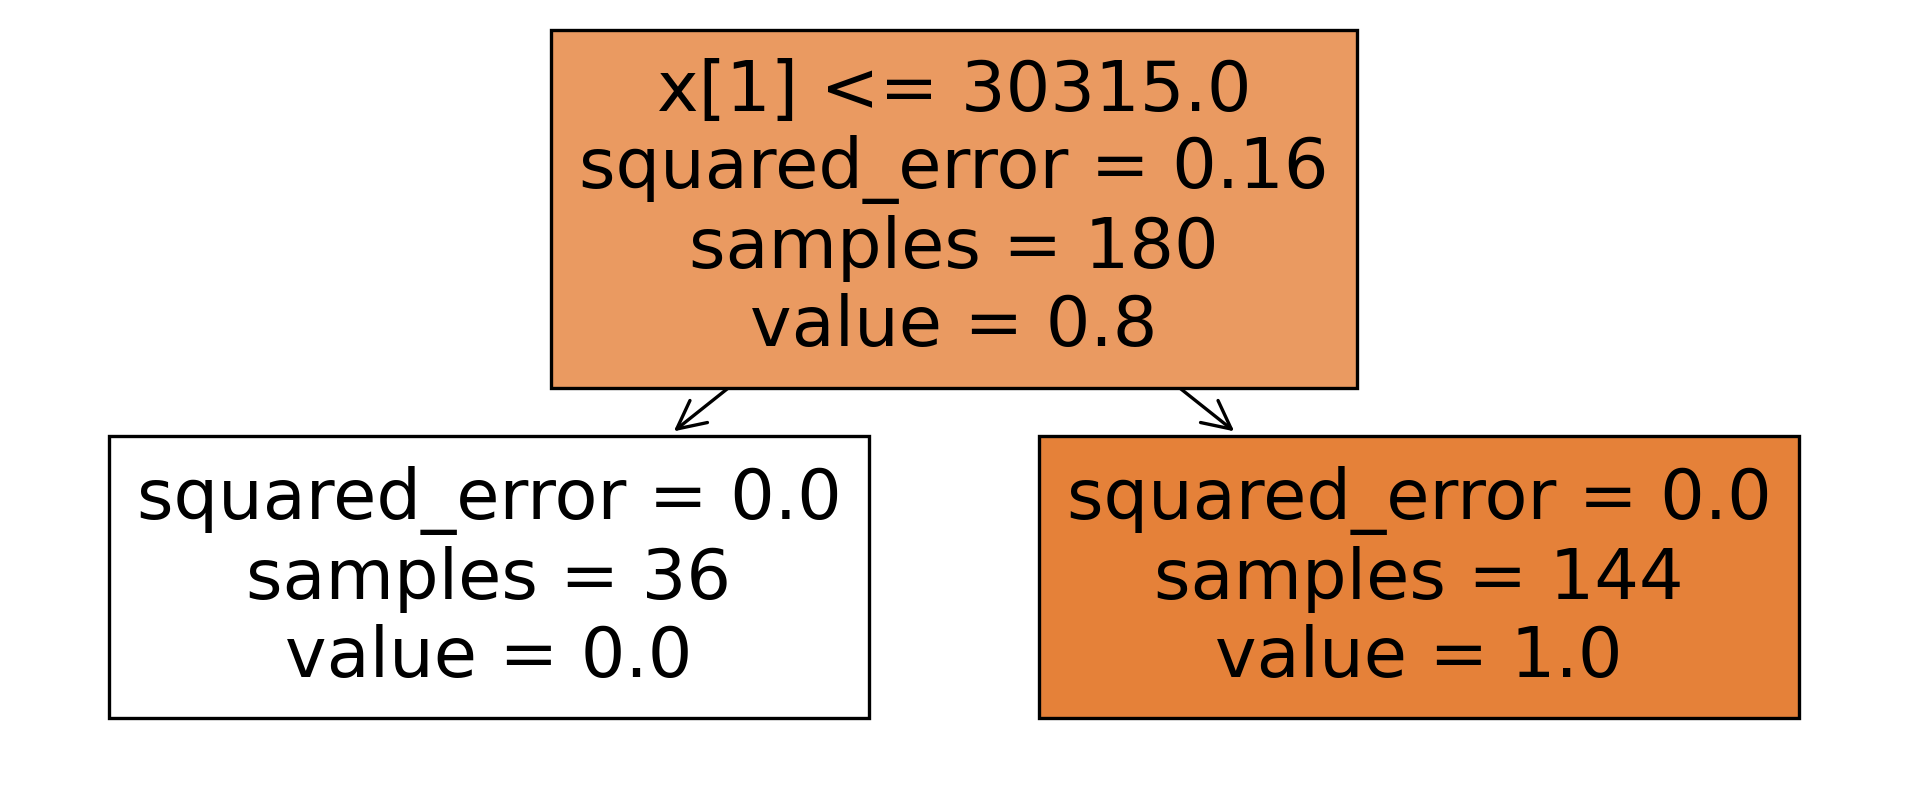

In [30]:
plt.subplots(figsize=(10,4),dpi=240)
tree.plot_tree(model,filled=True)

In [70]:
fn=['target','taxable income']
cn=['good','risky']


[Text(0.5, 0.75, 'taxable income <= 30315.0\nsquared_error = 0.16\nsamples = 180\nvalue = 0.8'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 36\nvalue = 0.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 144\nvalue = 1.0')]

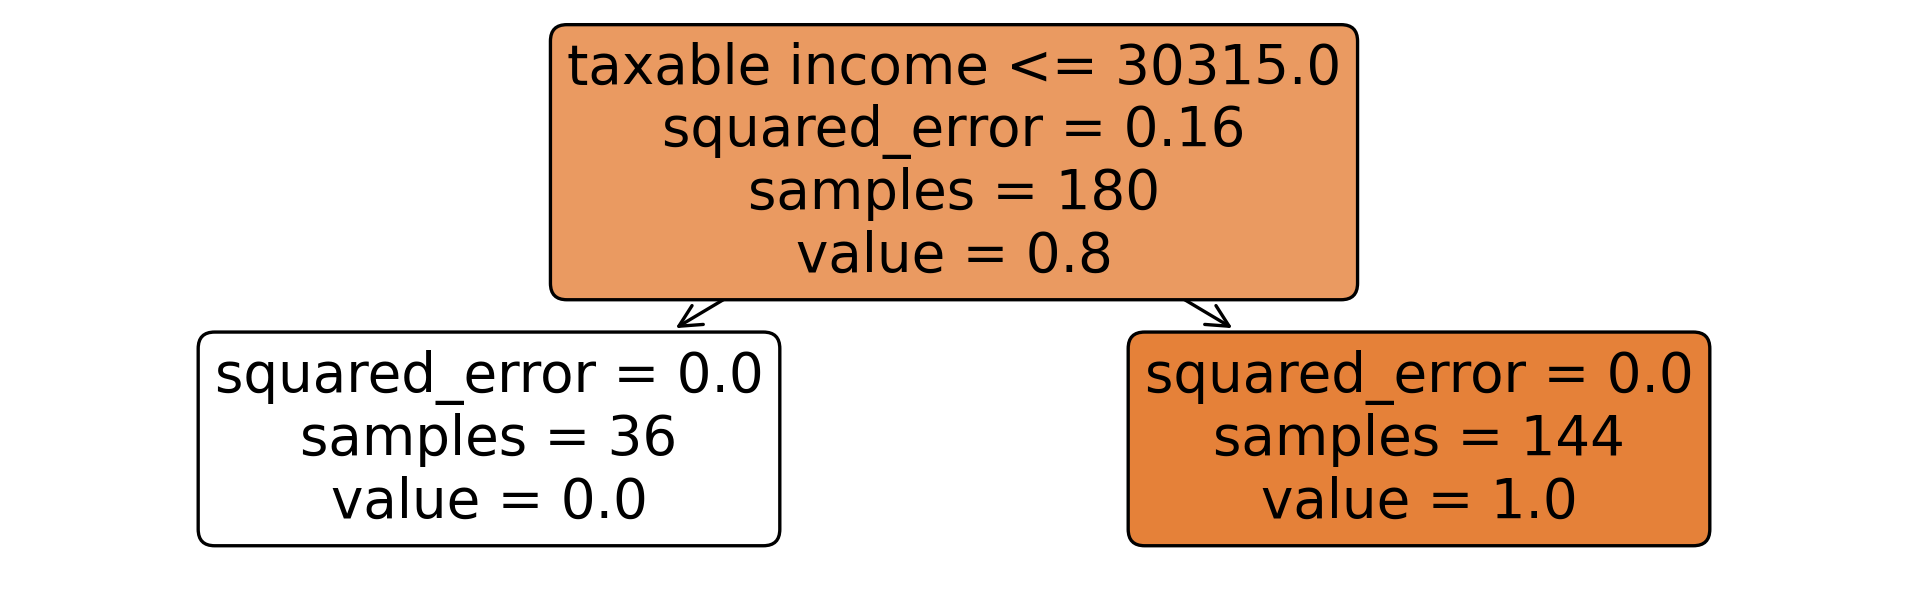

In [73]:
plt.subplots(figsize=(10,3),dpi=240)
tree.plot_tree(model,filled=True,feature_names=fn,class_names=['risky','good'],rounded=True)

In [75]:
model1=DecisionTreeClassifier(max_depth=6,min_samples_split=30)

In [76]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=30)

[Text(0.5, 0.75, 'taxable income <= 30315.0\ngini = 0.32\nsamples = 180\nvalue = [36, 144]\nclass = risky'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]\nclass = good'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 144\nvalue = [0, 144]\nclass = risky')]

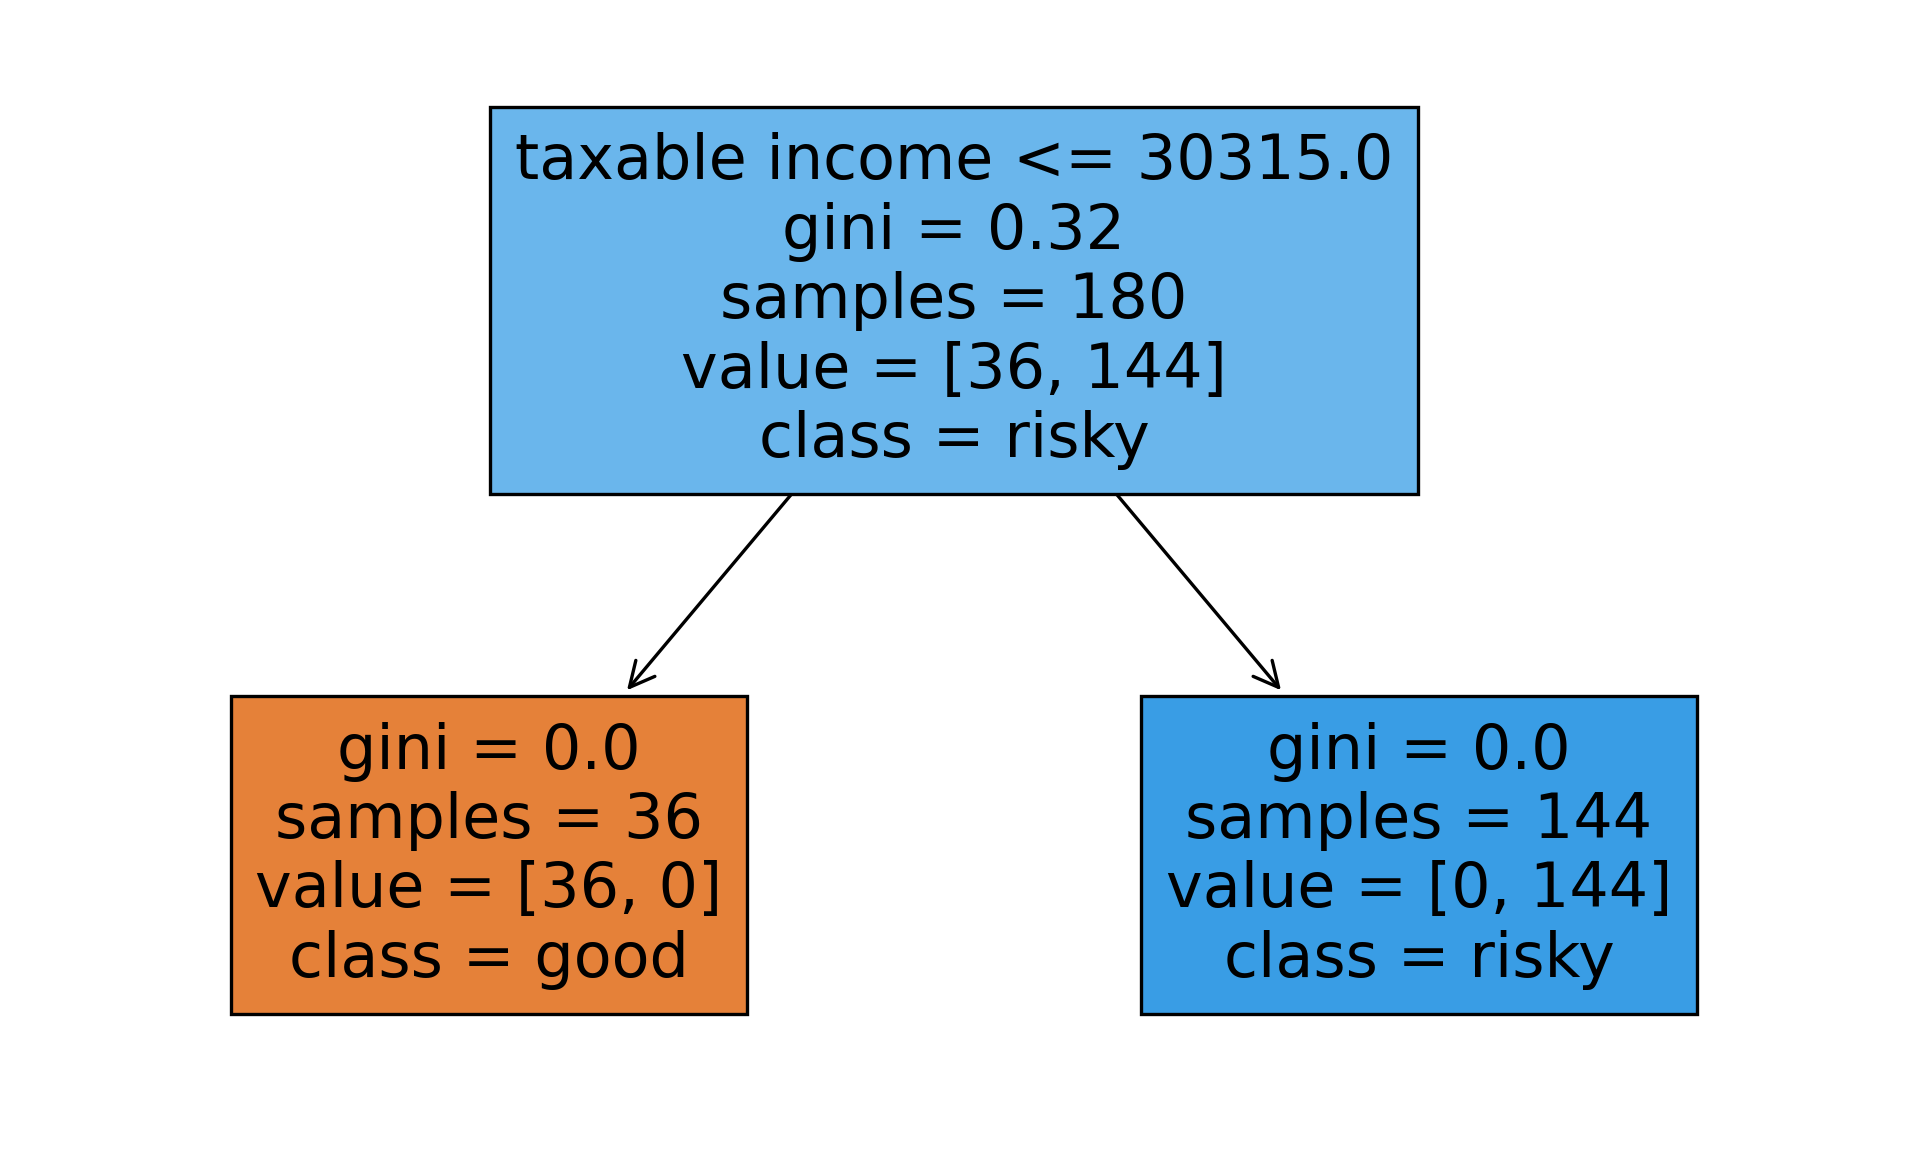

In [78]:
plt.subplots(figsize=(10,6),dpi=240)
tree.plot_tree(model1,filled=True,feature_names=fn,class_names=cn)